In [1]:
import pandas as pd

In [2]:
# create df
election_df = pd.read_csv('elections.csv')

In [3]:
election_df.head(4)

,Unnamed: 0,ons_id,result,first_party,second_party,electorate,valid_votes,invalid_votes,majority,con,...,green,snp,pc,dup,sf,sdlp,uup,alliance,other,other_winner
0,0,W07000049,Lab hold,Lab,Con,50750,31598,82,10490,6518,...,450,0,2711,0,0,0,0,0,731,0
1,1,W07000058,Con hold,Con,Lab,44699,31865,123,2034,14687,...,0,0,2704,0,0,0,0,0,0,0
2,2,S14000001,SNP hold,SNP,Con,62489,37413,72,12670,7535,...,880,20205,0,0,0,0,0,0,0,0
3,3,S14000002,SNP gain from Con,SNP,Con,65719,45638,131,3990,16398,...,0,20388,0,0,0,0,0,0,0,0


In [4]:
election_df['first_party'][0:4]

0    Lab
1    Con
2    SNP
3    SNP
Name: first_party, dtype: object

In [5]:
partiesdf = election_df['first_party'].unique()
partiesdf

array(['Lab', 'Con', 'SNP', 'PC', 'LD', 'DUP', 'SF', 'SDLP', 'Green',
       'Spk', 'Alliance'], dtype=object)

In [6]:
labWinsdf = len(election_df[election_df['first_party'] == 'Lab'])
labWinsdf

202

In [7]:
election_df['first_party'] == 'Lab'

0       True
1      False
2      False
3      False
4      False
       ...  
645     True
646    False
647    False
648     True
649    False
Name: first_party, Length: 650, dtype: bool

In [8]:
partyWinsdf = []

for i in partiesdf:
    partyWinsdf.append(len(election_df[election_df['first_party']==i]))
print(partiesdf)
partyWinsdf

['Lab' 'Con' 'SNP' 'PC' 'LD' 'DUP' 'SF' 'SDLP' 'Green' 'Spk' 'Alliance']


[202, 365, 48, 4, 11, 8, 7, 2, 1, 1, 1]

In [9]:
partyWinsdf = [len(election_df[election_df['first_party']==i]) for i in partiesdf]
print(partiesdf)
partyWinsdf

['Lab' 'Con' 'SNP' 'PC' 'LD' 'DUP' 'SF' 'SDLP' 'Green' 'Spk' 'Alliance']


[202, 365, 48, 4, 11, 8, 7, 2, 1, 1, 1]

In [10]:
partiesdf

array(['Lab', 'Con', 'SNP', 'PC', 'LD', 'DUP', 'SF', 'SDLP', 'Green',
       'Spk', 'Alliance'], dtype=object)

<AxesSubplot:>

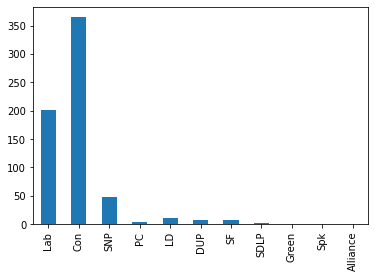

In [11]:
dfdf = pd.DataFrame(partyWinsdf,partiesdf)
dfdf.plot.bar(legend=False)


In [12]:
election_df.columns

Index(['Unnamed: 0', 'ons_id', 'result', 'first_party', 'second_party',
       'electorate', 'valid_votes', 'invalid_votes', 'majority', 'con', 'lab',
       'ld', 'brexit', 'green', 'snp', 'pc', 'dup', 'sf', 'sdlp', 'uup',
       'alliance', 'other', 'other_winner'],
      dtype='object')

In [13]:
parties = list(partiesdf)
parties.remove('Spk')
seats = list(partyWinsdf)[:-1]
#seats.remove('Spk')
print(seats)

total_votes=election_df['valid_votes'].sum()

print(total_votes)
total_votes_party = [election_df[i.lower()].sum(axis=0) for i in parties]
total_votes_party

[202, 365, 48, 4, 11, 8, 7, 2, 1, 1]
32014110


[10269051,
 13966454,
 1242380,
 153265,
 3696419,
 244128,
 181853,
 118737,
 865715,
 134115]

,parties,percentage_votes,percentage_seats,deficit
0,Lab,32.076641,31.076923,-0.999718
1,Con,43.625932,56.153846,12.527914
2,SNP,3.880726,7.384615,3.503889
3,PC,0.478742,0.615385,0.136643
4,LD,11.546218,1.692308,-9.853911
5,DUP,0.762564,1.230769,0.468205
6,SF,0.568040,1.076923,0.508883
7,SDLP,0.370890,0.307692,-0.063197
8,Green,2.704167,0.153846,-2.550321
9,Alliance,0.418925,0.153846,-0.265079


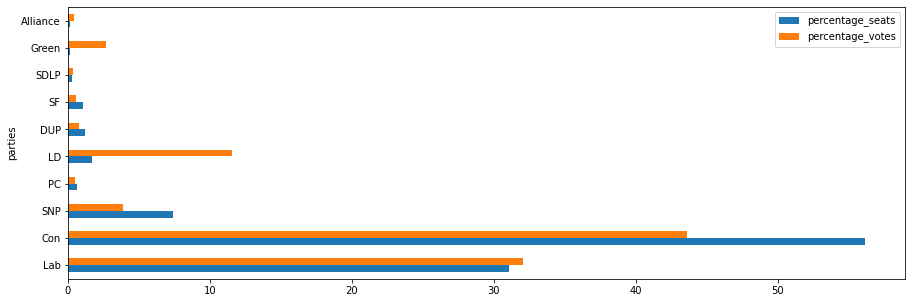

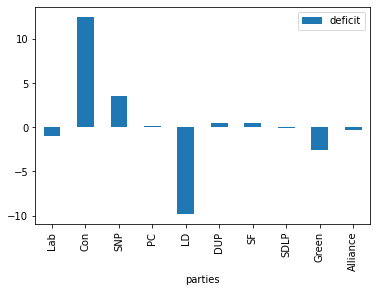

In [14]:
share = [ total_votes_party[i]/total_votes*100 for i in range(0,len(total_votes_party))]

sharedf = pd.DataFrame()
sharedf['parties'] = parties
sharedf['percentage_votes'] = total_votes_party
sharedf['percentage_votes']=sharedf['percentage_votes']/total_votes*100
sharedf['percentage_seats'] = seats
sharedf['percentage_seats']=sharedf['percentage_seats']/650*100
sharedf['deficit']=sharedf['percentage_seats']-sharedf['percentage_votes']

sharedf.plot.barh(x='parties',y=['percentage_seats','percentage_votes'],figsize=(15,5))
sharedf.plot.bar(x='parties',y='deficit')

sharedf